# Yahoo Finance API
---

In this notebook, we prepare the CSV files we will be using for our C++ computations. We rely on the notorious `yfinance` API.

In [1]:
# relevant libraries
import numpy as np
import pandas as pd
import yfinance as yf

Once this is done, we load the 4 needed time series:

In [2]:
# NVDA, AAPL, MSFT, AMZN tickers
tickers = ['NVDA', 'AAPL', 'MSFT', 'AMZN']

# download daily closing prices from Yahoo Finance
# auto_adjust=True to get adjusted close prices, adjusted for dividends and splits
data = yf.download(tickers, start='2020-01-01', end='2025-11-06', auto_adjust=True)['Close']

data.head()

[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,MSFT,NVDA
Date,,,,
2020-01-02,72.538513,94.900497,152.791122,5.971410
2020-01-03,71.833298,93.748497,150.888611,5.875833
2020-01-06,72.405670,95.143997,151.278625,5.900474
2020-01-07,72.065155,95.343002,149.899307,5.971907
2020-01-08,73.224403,94.598503,152.286987,5.983109


We compute the daily returns, as expressed by:

$$
r_{i, t} = \frac{P_{i, t} - P_{i, t- 1}}{P_{i, t-1}}
$$

where $P_{i, t}$ is the closing price for stock $i$ at time $t$.

In [3]:
# daily returns computation
returns = data.pct_change().dropna()

# drop index name
returns.index.name = 'Date'
returns.columns.name = None

returns.head()

,AAPL,AMZN,MSFT,NVDA
Date,,,,
2020-01-03,-0.009722,-0.012139,-0.012452,-0.016006
2020-01-06,0.007968,0.014886,0.002585,0.004194
2020-01-07,-0.004703,0.002092,-0.009118,0.012106
2020-01-08,0.016086,-0.007809,0.015929,0.001876
2020-01-09,0.021241,0.004799,0.012493,0.010983


We plot the four distributions of these returns:

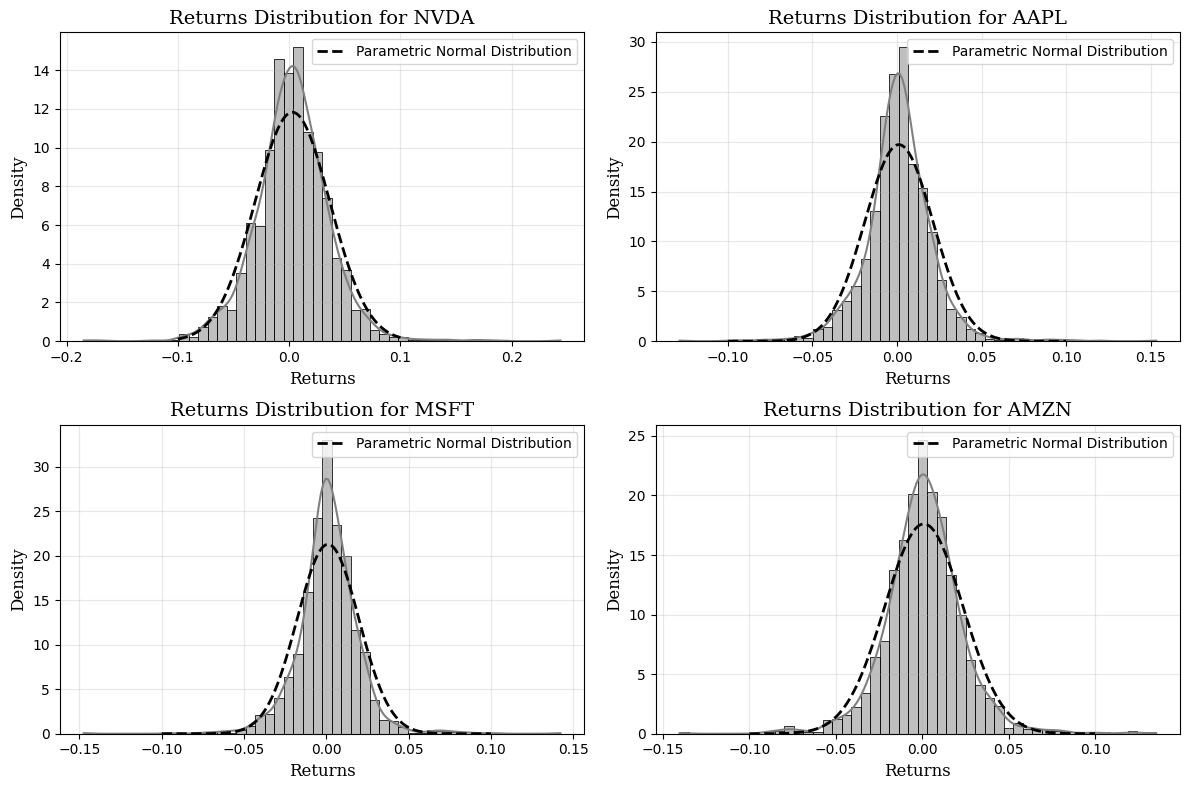

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# We plot the four empirical distributions of these returns:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

for i, ticker in enumerate(tickers):
    sns.histplot(returns[ticker], bins=50, kde=True, color = "grey", ax=ax[i // 2, i % 2], stat="density")

# overlay a parametric normal distribution for comparison
x = np.linspace(-0.1, 0.1, 1000)
for i, ticker in enumerate(tickers):
    mu = returns[ticker].mean()
    sigma = returns[ticker].std()
    y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    ax[i // 2, i % 2].plot(x, y, color='black', linestyle='--', label='Parametric Normal Distribution', linewidth=2)
    ax[i // 2, i % 2].legend()
    ax[i // 2, i % 2].set_title(f'Returns Distribution for {ticker}', family='serif', fontsize=14)
    ax[i // 2, i % 2].set_xlabel('Returns', family='serif', fontsize=12)
    ax[i // 2, i % 2].set_ylabel('Density', family='serif', fontsize=12)
    ax[i // 2, i % 2].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../images/returns_distributions.png', dpi=500)
plt.show()

Now, we finally export the csv data set:

In [ ]:
# drop the date index, just raw returns values
returns.reset_index(drop=True, inplace=True)
returns.head()

,AAPL,AMZN,MSFT,NVDA
0,-0.009722,-0.012139,-0.012452,-0.016006
1,0.007968,0.014886,0.002585,0.004194
2,-0.004703,0.002092,-0.009118,0.012106
3,0.016086,-0.007809,0.015929,0.001876
4,0.021241,0.004799,0.012493,0.010983


In [6]:
# export the csv data set without the index:
returns.to_csv('../data/stock_returns.csv', index=False)